# Burn Rate Prediction (Neural Network)

Understanding what will be the Burn Rate for the employee working in an organization based on the current pandemic situation where work from home is a boon and a bane. How are employees' Burn Rate affected based on various conditions provided?

Globally, World Mental Health Day is celebrated on October 10 each year. The objective of this day is to raise awareness about mental health issues around the world and mobilize efforts in support of mental health. According to an anonymous survey, about 450 million people live with mental disorders that can be one of the primary causes of poor health and disability worldwide. These days when the world is suffering from a pandemic situation, it becomes really hard to maintain mental fitness.

Before we go further, I'd like to tell you that I got the dataset from <a href="https://www.kaggle.com/blurredmachine/are-your-employees-burning-out?select=train.csv">here</a>. So let's get started on it.

In [1]:
# Import Neccessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the Dataset

df = pd.read_csv('Burn Rate.csv')

In [6]:
df.head()

,Employee ID,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,Female,Service,No,3,7.0,6.9,0.52


- `Employee ID`: The unique ID allocated for each employee (example: `fffe390032003000`)
- `Gender`: The gender of the employee (`Male`/`Female`)
- `Company Type`: The type of company where the employee is working (`Service`/`Product`)
- `WFH Setup Available`: Is the work from home facility available for the employee (`Yes`/`No`)
- `Designation`: The designation of the employee of work in the organization. (In the range of `[0.0, 5.0]` bigger is higher designation.)
- `Resource Allocation`: The amount of resource allocated to the employee to work, ie. number of working hours. (In the range of `[1.0, 10.0]` (higher means more resource))
- `Mental Fatigue Score`: The level of fatigue mentally the employee is facing. (In the range of `[0.0, 10.0]` where 0.0 means no fatigue and 10.0 means completely fatigue.)
- `Burn Rate`: The value we need to predict for each employee telling the rate of Bur out while working. (In the range of `[0.0, 1.0]` where the higher the value is more is the burn out.)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Gender                22750 non-null  object 
 2   Company Type          22750 non-null  object 
 3   WFH Setup Available   22750 non-null  object 
 4   Designation           22750 non-null  int64  
 5   Resource Allocation   21369 non-null  float64
 6   Mental Fatigue Score  20633 non-null  float64
 7   Burn Rate             21626 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.4+ MB


#### Dealing with Missing Values

In [4]:
df.isnull().sum()

Employee ID                0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [10]:
df.dropna(inplace = True)

In [47]:
df.shape[0]

18590

#### Exploratory Data Analysis

C:\Users\latif\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


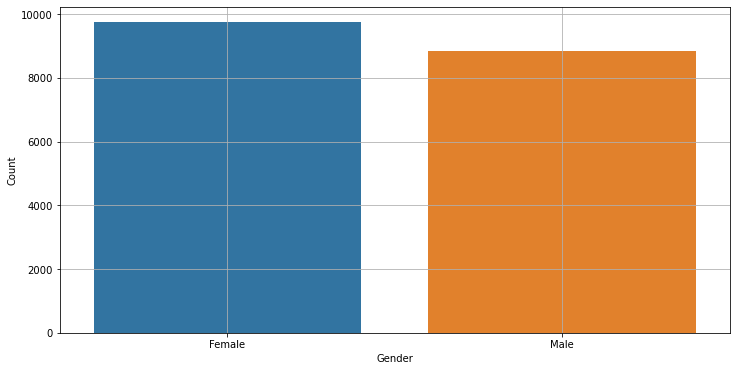

In [12]:
plt.figure(figsize = (12, 6))
sns.countplot(df['Gender'])
plt.grid()
plt.ylabel('Count')
plt.show()

C:\Users\latif\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


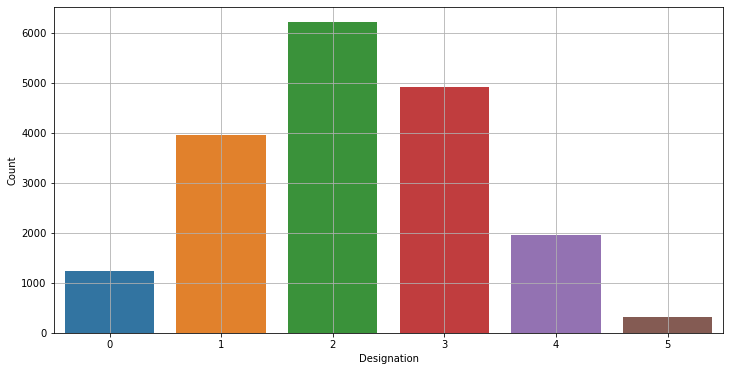

In [13]:
plt.figure(figsize = (12, 6))
sns.countplot(df['Designation'])
plt.grid()
plt.ylabel('Count')
plt.show()

C:\Users\latif\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


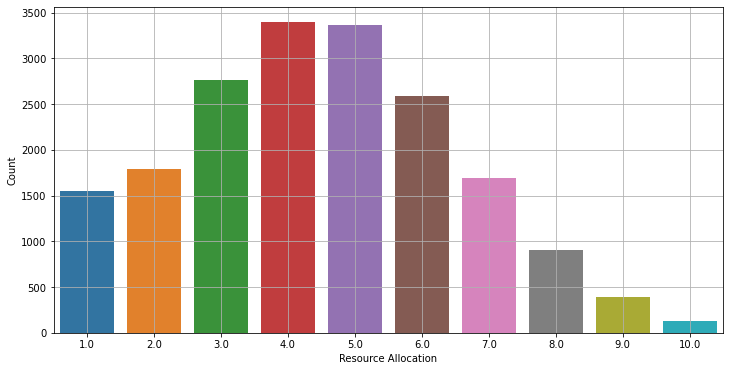

In [14]:
plt.figure(figsize = (12, 6))
sns.countplot(df['Resource Allocation'])
plt.grid()
plt.ylabel('Count')
plt.show()

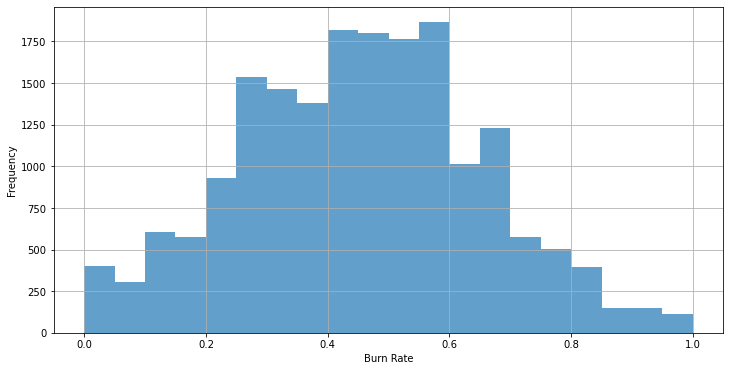

In [36]:
df['Burn Rate'].plot(kind = 'hist', 
                     figsize = (12, 6), 
                     bins = 20, 
                     linewidth = 0.5, 
                     alpha = 0.7)
plt.grid()
plt.xlabel('Burn Rate')
plt.show()

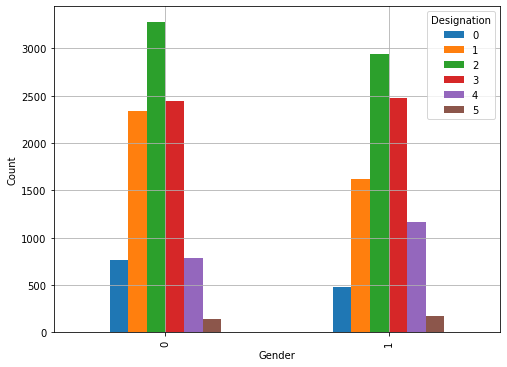

In [37]:
pd.crosstab(df['Gender'], df['Designation']).plot(kind = 'bar', 
                                                  figsize = (8, 6))
plt.grid()
plt.ylabel('Count')
plt.show()

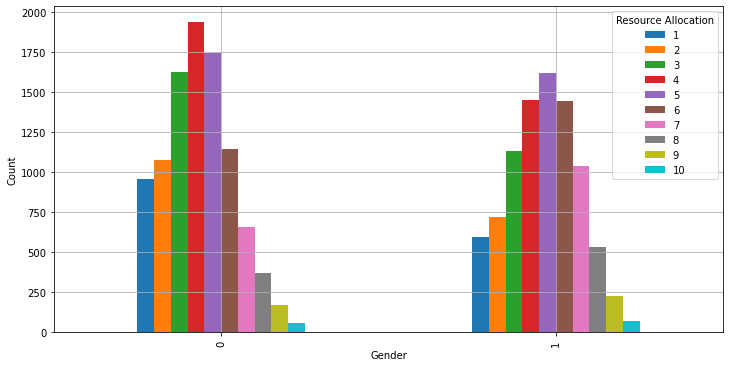

In [38]:
pd.crosstab(df['Gender'], df['Resource Allocation']).plot(kind = 'bar', 
                                                          figsize = (12, 6))
plt.grid()
plt.ylabel('Count')
plt.show()

#### Change Categorical Columns into Numerical Columns for Analysis

In [19]:
df['Gender'] = df['Gender'].apply(lambda x: 0 if x == 'Female' else 1)
df['Company Type'] = df['Company Type'].apply(lambda x: 0 if x == 'Service' else 1)
df['WFH Setup Available'] = df['WFH Setup Available'].apply(lambda x: 0 if x == 'No' else 1)
df['Resource Allocation'] = df['Resource Allocation'].astype(int)

In [22]:
df.head()

,Employee ID,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,0,0,0,2,3,3.8,0.16
1,fffe3700360033003500,1,0,1,1,2,5.0,0.36
3,fffe32003400380032003900,1,0,1,1,1,2.6,0.20
4,fffe31003900340031003600,0,0,0,3,7,6.9,0.52
5,fffe3300350037003500,1,1,1,2,4,3.6,0.29


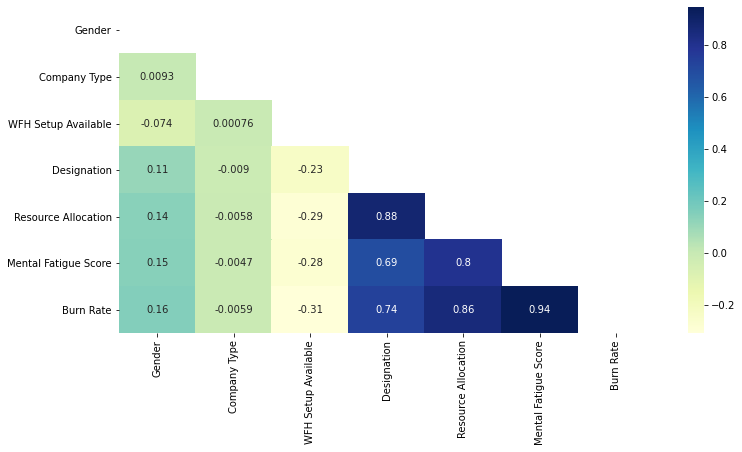

In [49]:
# Correlation

corr = df[['Gender', 
           'Company Type', 
           'WFH Setup Available',
           'Designation', 
           'Resource Allocation', 
           'Mental Fatigue Score',
           'Burn Rate'
          ]].corr()
plt.figure(figsize = (12, 6))
sns.heatmap(corr, annot = True, mask = np.triu(corr), cmap="YlGnBu")
plt.show()

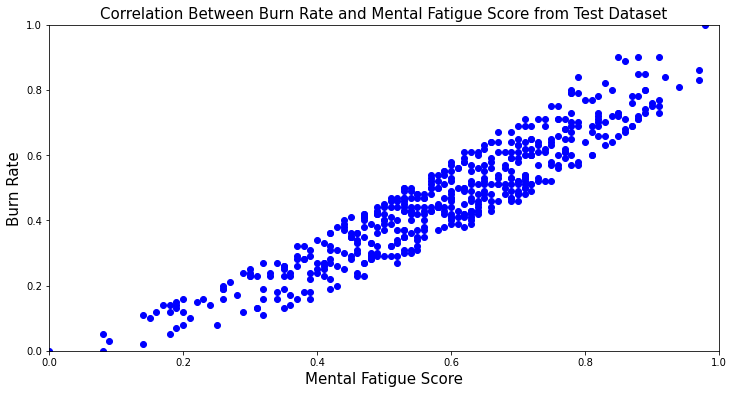

In [41]:
plt.figure(figsize = (12, 6))
plt.scatter(X_test_sample[:, 5], y_test_sample, color = 'b')
plt.axis([0, 1, 0, 1])
plt.title('Correlation Between Burn Rate and Mental Fatigue Score from Test Dataset', fontsize = 15)
plt.xlabel('Mental Fatigue Score', fontsize = 15)
plt.ylabel('Burn Rate', fontsize = 15)
plt.show()

In [20]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,18590.0,0.475686,0.499422,0.0,0.00,0.00,1.00,1.0
Company Type,18590.0,0.345132,0.475424,0.0,0.00,0.00,1.00,1.0
WFH Setup Available,18590.0,0.539537,0.498448,0.0,0.00,1.00,1.00,1.0
Designation,18590.0,2.179398,1.133148,0.0,1.00,2.00,3.00,5.0
Resource Allocation,18590.0,4.486552,2.044848,1.0,3.00,4.00,6.00,10.0
Mental Fatigue Score,18590.0,5.732173,1.920547,0.0,4.60,5.90,7.10,10.0
Burn Rate,18590.0,0.452444,0.197848,0.0,0.32,0.45,0.59,1.0


#### Normalize the Data

Normalization helps to reduce redundancy and complexity by examining new data types used in the table. It is helpful to divide the large database table into smaller tables and link them using relationships. It avoids duplicate data or no repeating groups into a table.

In [23]:
df['Designation Normalize'] = (df['Designation'] - df['Designation'].min()) / (df['Designation'].max() - df['Designation'].min()) 
df['Resource Allocation Normalize'] = (df['Resource Allocation'] - df['Resource Allocation'].min()) / (df['Resource Allocation'].max() - df['Resource Allocation'].min())
df['Mental Fatigue Score Normalize'] = (df['Mental Fatigue Score'] - df['Mental Fatigue Score'].min()) / (df['Mental Fatigue Score'].max() - df['Mental Fatigue Score'].min())

#### Build the Model

In [24]:
X = df[['Gender', 
        'Company Type', 
        'WFH Setup Available',
        'Designation Normalize', 
        'Resource Allocation Normalize',
        'Mental Fatigue Score Normalize']]
y = df['Burn Rate']

In [25]:
# Split the data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [44]:
print(f'Train: {X_train.shape[0]}')
print(f'Test: {X_test.shape[0]}')

Train: 13942
Test: 4648


Since there is too much data, I would like to use a sample of the data which is the first 2000 rows of the training dataset for training and the first 500 rows of the test dataset for testing.

In [26]:
X_train_sample = X_train[:2000]
X_test_sample = X_test[:500]
y_train_sample = y_train[:2000]
y_test_sample = y_test[:500]

In [27]:
# Artificial Neural Network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

X_train_sample = np.array(X_train_sample)
X_test_sample = np.array(X_test_sample)
y_train_sample = np.array(y_train_sample)
y_test_sample = np.array(y_test_sample)

model = Sequential()

model.add(Dense(X_train_sample.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

r = model.fit(X_train_sample, y_train_sample,
              validation_data=(X_test_sample,y_test_sample),
              batch_size=1,
              epochs=100)

test_pred = model.predict(X_test_sample)
train_pred = model.predict(X_train_sample)

Epoch 1/100
2000/2000 [==============================] - 5s 3ms/step - loss: 0.0521 - val_loss: 0.0161
Epoch 2/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0148 - val_loss: 0.0114
Epoch 3/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0116 - val_loss: 0.0093
Epoch 4/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0102 - val_loss: 0.0084
Epoch 5/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0092 - val_loss: 0.0083
Epoch 6/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0085 - val_loss: 0.0070
Epoch 7/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0079 - val_loss: 0.0064
Epoch 8/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0071 - val_loss: 0.0061
Epoch 9/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0069 - val_loss: 0.0057
Epoch 10/100
2000/2000 [==============================] - 5s 2ms/step - l

Epoch 80/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0037 - val_loss: 0.0039
Epoch 81/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch 82/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0037 - val_loss: 0.0039
Epoch 83/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 84/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0037 - val_loss: 0.0039
Epoch 85/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 86/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 87/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 88/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 89/100
2000/2000 [==============================] - 5s 2ms

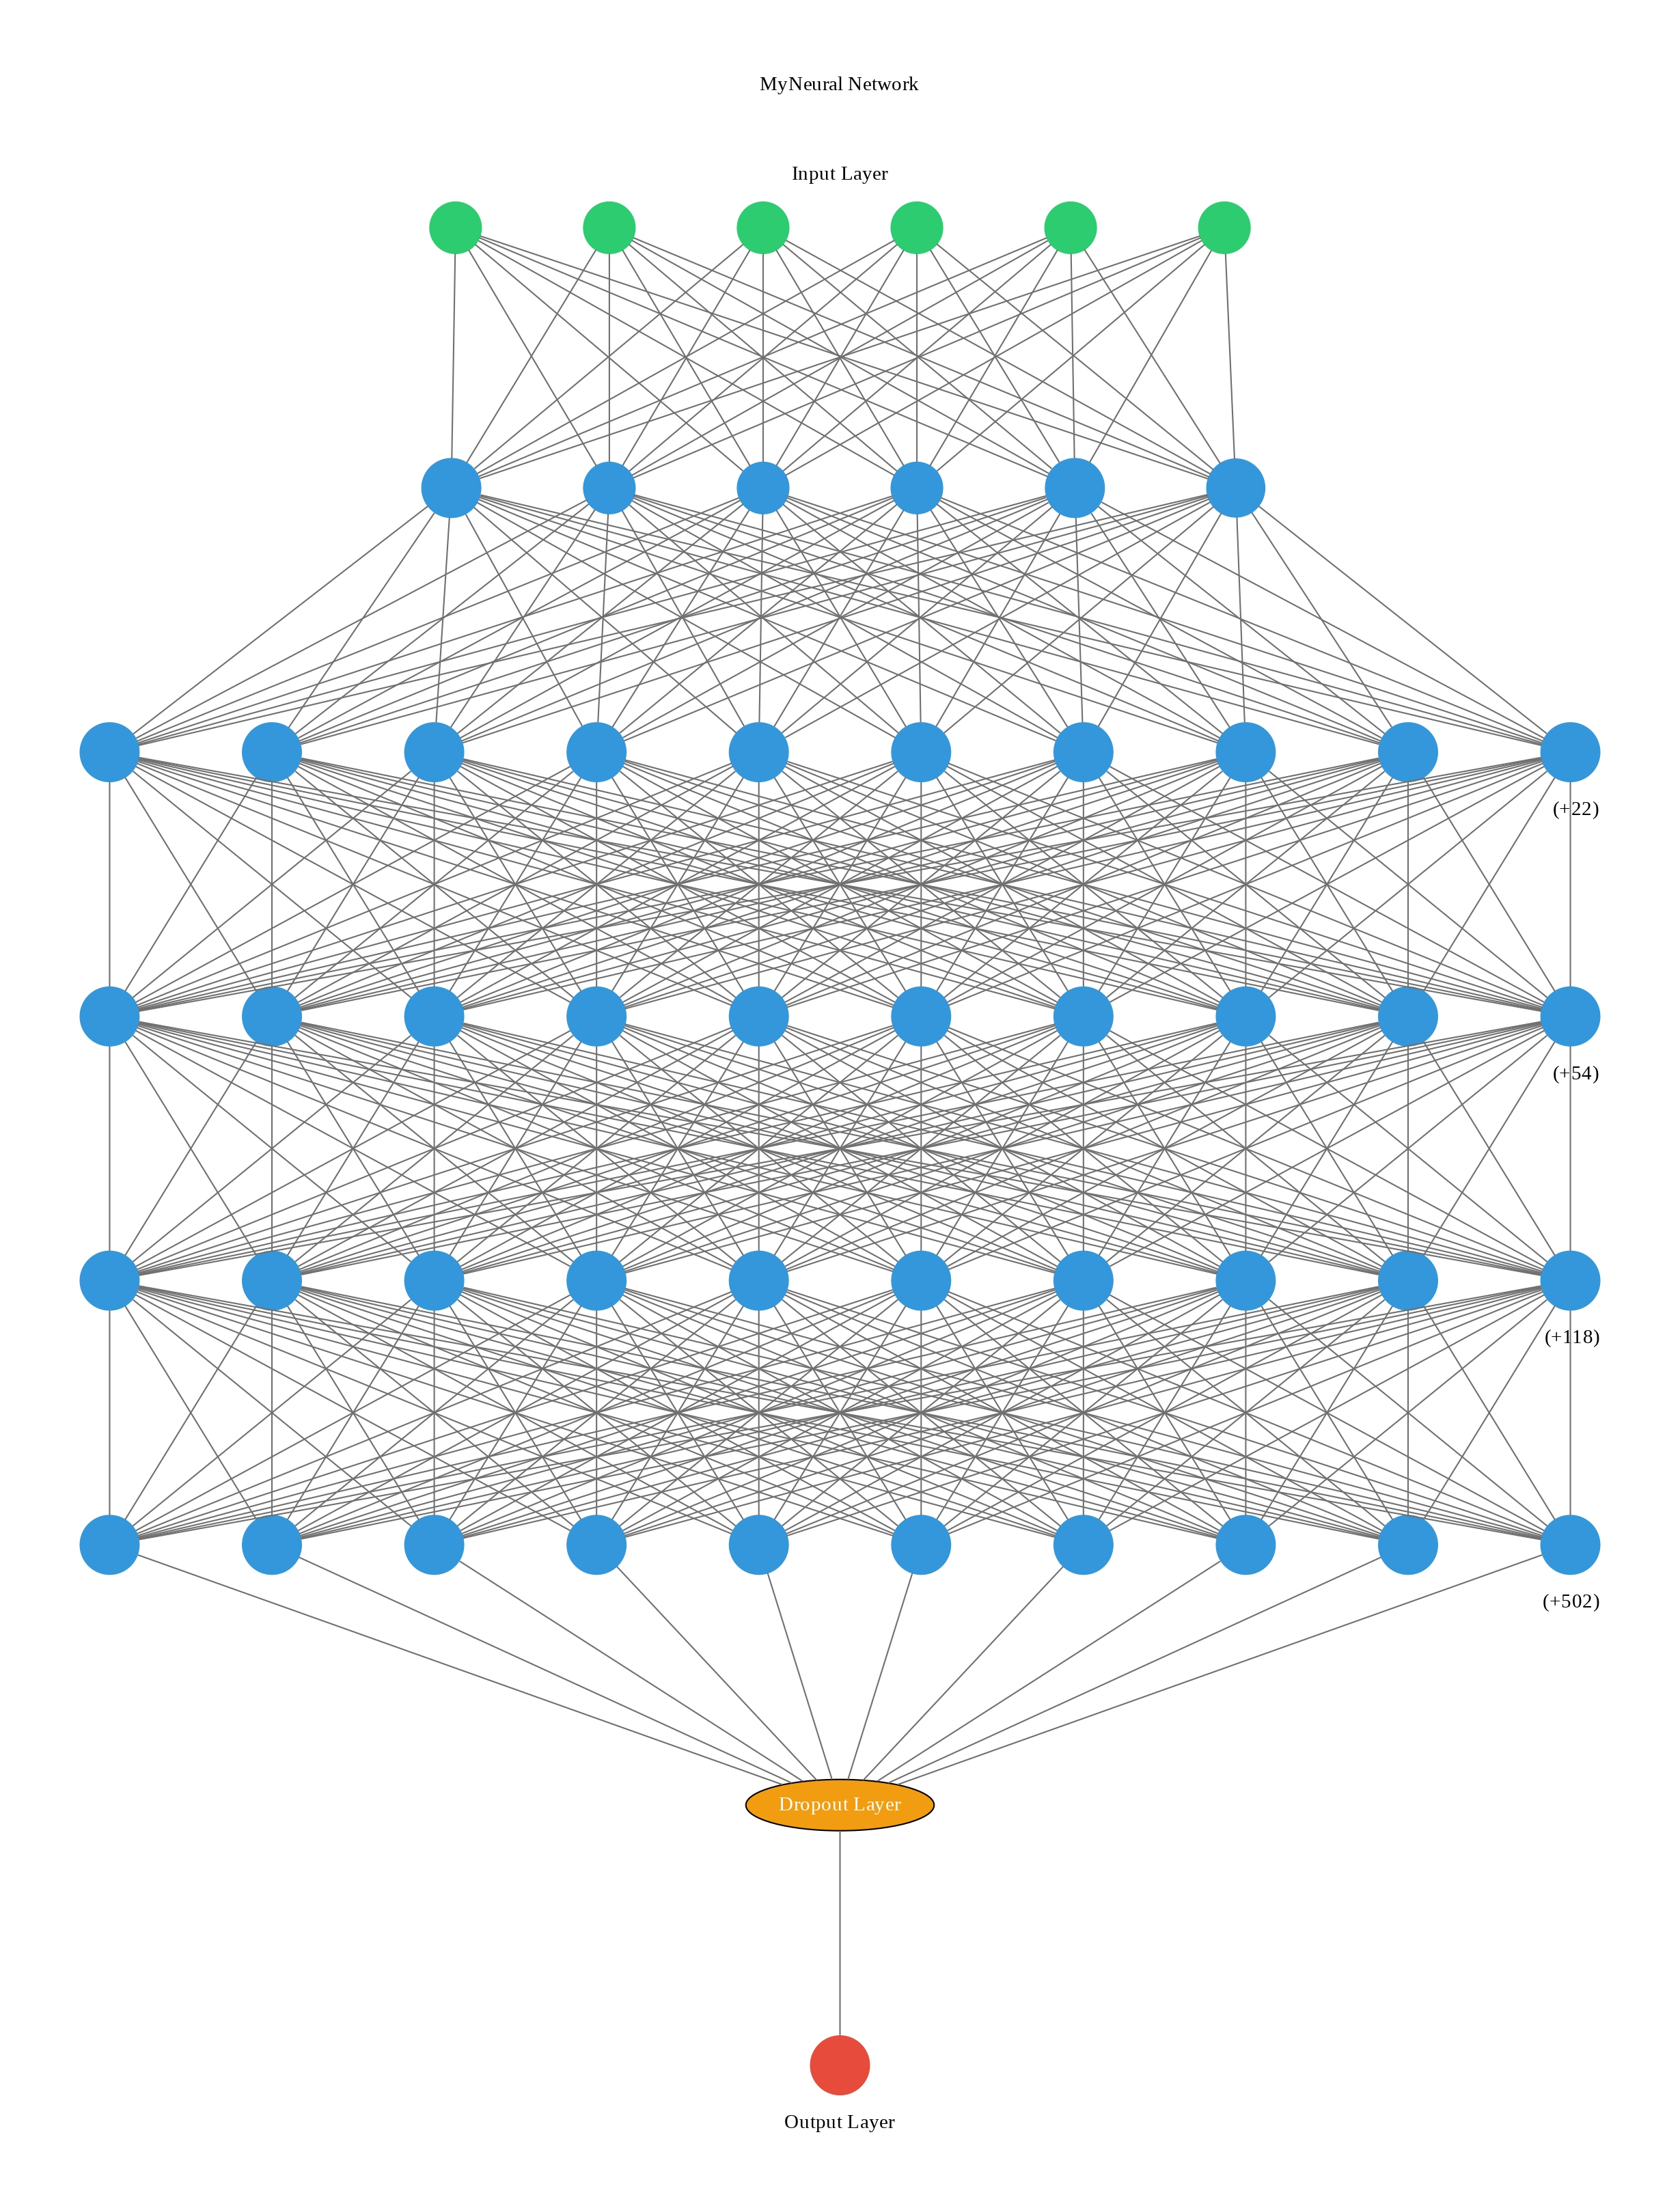

If you want to visualize your Neural Network model, you can look at <a href="https://reposhub.com/python/deep-learning/Prodicode-ann-visualizer.html">this</a> documentation.

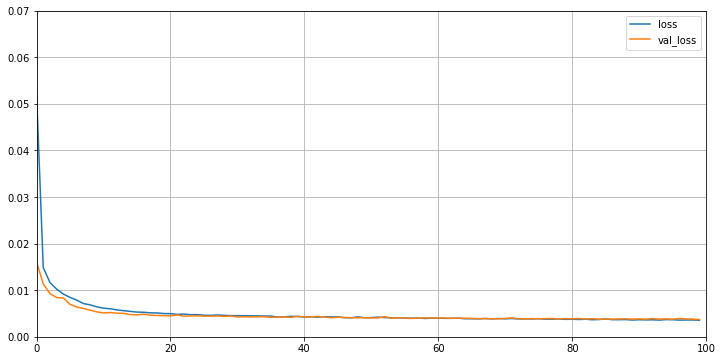

In [28]:
pd.DataFrame(r.history).plot(figsize = (12, 6))
plt.axis([0, 100, 0, 0.07])
plt.grid()

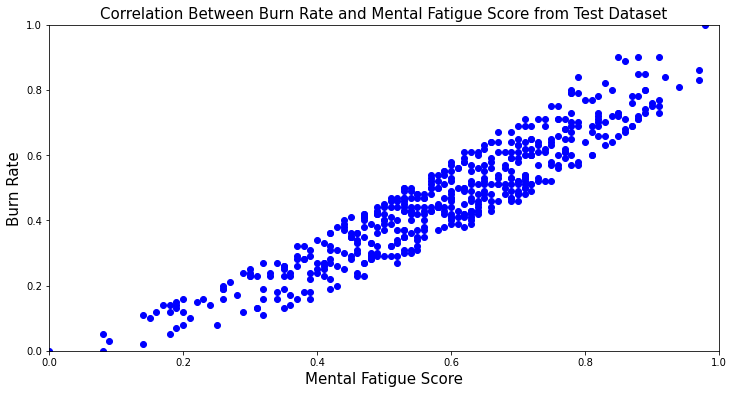

In [42]:
plt.figure(figsize = (12, 6))
plt.scatter(X_test_sample[:, 5], y_test_sample, color = 'b')
plt.axis([0, 1, 0, 1])
plt.title('Correlation Between Burn Rate and Mental Fatigue Score from Test Dataset', fontsize = 15)
plt.xlabel('Mental Fatigue Score', fontsize = 15)
plt.ylabel('Burn Rate', fontsize = 15)
plt.show()

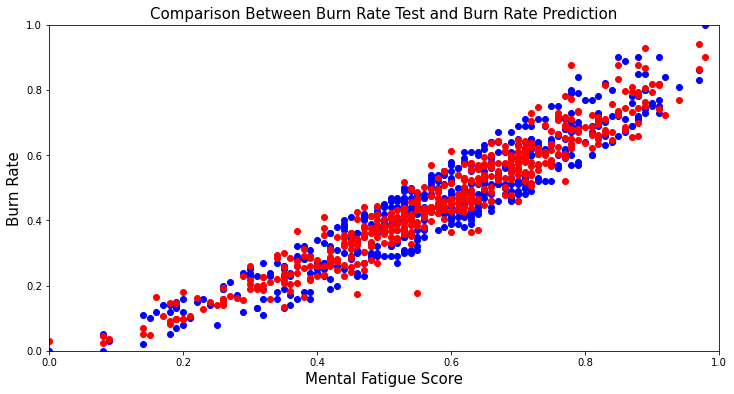

In [43]:
plt.figure(figsize = (12, 6))
plt.scatter(X_test_sample[:, 5], y_test_sample, color = 'b')
plt.scatter(X_test_sample[:, 5], test_pred, color = 'r')
plt.axis([0, 1, 0, 1])
plt.title('Comparison Between Burn Rate Test and Burn Rate Prediction', fontsize = 15)
plt.xlabel('Mental Fatigue Score', fontsize = 15)
plt.ylabel('Burn Rate', fontsize = 15)
plt.show()

#### Evaluation

In [31]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

R2_test = round(r2_score(y_test_sample, test_pred), 3)
R2_train = round(r2_score(y_train_sample, train_pred), 3)

MAE_test = round(mean_absolute_error(y_test_sample, test_pred), 6)
MAE_train = round(mean_absolute_error(y_train_sample, train_pred), 6)

MSE_test = round(mean_squared_error(y_test_sample, test_pred), 6)
MSE_train = round(mean_squared_error(y_train_sample, train_pred), 6)

RMSE_test = round(np.sqrt(MSE_test), 6)
RMSE_train = round(np.sqrt(MSE_train), 6)

In [32]:
Evaluation = pd.DataFrame({'Dataset' : ['Test', 'Train'],
                           'R2-Score': [R2_test, R2_train],
                           'Mean Absolute Error': [MAE_test, MAE_train],
                           'Mean Squared Error': [MSE_test, MSE_train],
                           'RMSE': [RMSE_test, RMSE_train]})
Evaluation

,Dataset,R2-Score,Mean Absolute Error,Mean Squared Error,RMSE
0,Test,0.892,0.049725,0.003693,0.060770
1,Train,0.917,0.046197,0.003282,0.057289


#### Conclusion

From this analysis, we know that we can predict "Burn Rate" using Neural Network because the model gave us a good R2-Score which is 0.892 for Test and 0.917 for Training, and also the model gave us a pretty low value of Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error.